# Exploring Dandiset 001433: Breathing Rhythm and Place Dataset in Mice

**⚠️ CAUTION: AI-GENERATED NOTEBOOK ⚠️**

This notebook was generated by an AI system and has not been fully verified. Use caution when interpreting the code or results. Always validate the outputs and analysis before drawing conclusions.

## Overview of the Dandiset

This notebook explores Dandiset 001433, which contains behavioral and electrophysiological data from mice. The recordings include sniffing patterns, video data, and olfactory bulb (OB) electrophysiology in freely-behaving mice without any specific stimulus, reward, or task.

**Dandiset Link:** [https://dandiarchive.org/dandiset/001433/0.250507.2356](https://dandiarchive.org/dandiset/001433/0.250507.2356)

**Key Information:**
- **Name:** Breathing rhythm and place dataset
- **Description:** Behavioral and electrophysiological data from recordings of sniffing, video, and OB electrophysiology in freely-behaving mice with no stimulus, reward, or task
- **Contributors:** National Institutes of Health (NIH), Smear, Matt
- **Measurement Techniques:** 
  - Surgical technique
  - Multi electrode extracellular electrophysiology recording
  - Analytical technique

## What This Notebook Covers

In this notebook, we will:

1. Connect to the DANDI archive and retrieve basic Dandiset information
2. Explore the structure of an NWB (Neurodata Without Borders) file from the dataset
3. Examine and visualize Local Field Potential (LFP) data from the olfactory bulb
4. Analyze sniffing signal data and respiratory patterns
5. Visualize relationships between neural activity and breathing patterns
6. Demonstrate how to access and work with different types of data in this Dandiset

## Required Packages

This notebook requires several Python packages for accessing and analyzing the data. We'll assume these packages are already installed in your environment:

In [1]:
# Basic data handling and visualization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import signal

# DANDI and NWB tools
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
from itertools import islice

# Configure plotting
sns.set_theme()
plt.rcParams['figure.figsize'] = (14, 6)

## Loading the Dandiset

We'll first connect to the DANDI archive and retrieve basic information about Dandiset 001433:

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001433", "0.250507.2356")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {dandiset.get_url('0.250507.2356')}")
print(f"Dandiset description: {metadata.get('description', 'No description available')}")
print(f"Contributors: {', '.join(metadata.get('contributor', ['Unknown']))}")

Dandiset name: Breathing rhythm and place dataset


AttributeError: 'RemoteDandiset' object has no attribute 'get_url'

Let's list some of the assets available in this Dandiset to get a better understanding of its structure:

In [3]:
# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nSample assets from this Dandiset:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (Size: {asset.size // (1024*1024)} MB, ID: {asset.identifier})")


Sample assets from this Dandiset:
- sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb (Size: 255 MB, ID: 63d19f03-2a35-48bd-a54f-9ab98ceb7be2)
- sub-4122/sub-4122_ses-20250507T152930_ecephys.nwb (Size: 314 MB, ID: cce2f86c-2440-4358-8298-75cb2faa83f1)
- sub-4122/sub-4122_ses-20250507T152933_ecephys.nwb (Size: 389 MB, ID: 154a5db2-9bad-48b9-bbe4-13376c315cbe)
- sub-4127/sub-4127_ses-20250507T152941_ecephys.nwb (Size: 469 MB, ID: 8a2c176c-846d-432c-9c7b-cfd0cefa40cb)
- sub-4127/sub-4127_ses-20250507T152953_ecephys.nwb (Size: 1007 MB, ID: ba3b58b3-38ff-49d4-bc73-2105c87ecf49)


## Exploring an NWB File

Now, let's load one of the NWB files from this Dandiset. We'll focus on `sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb`, which contains olfactory bulb LFP recordings and sniffing data.

In [4]:
# Define the asset ID for the NWB file we want to examine
asset_id = "63d19f03-2a35-48bd-a54f-9ab98ceb7be2"  # ID for sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb
asset_url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"

# Open the NWB file remotely
remote_file = remfile.File(asset_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print basic information about the NWB file
print(f"NWB file: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Experiment description: {nwb.experiment_description}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject species: {nwb.subject.species}")
print(f"Subject sex: {nwb.subject.sex}")
print(f"Subject age: {nwb.subject.age} ({nwb.subject.age__reference})")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Keywords: {', '.join([str(k) for k in nwb.keywords[:]])}")

NWB file: 4122_4
Session description: LFP and sniff recording
Experiment description: LFP and sniff behavior recording
Subject ID: 4122
Subject species: Mus musculus
Subject sex: M
Subject age: P90D (birth)
Lab: Smear lab
Institution: University of Oregon
Session start time: 2025-05-07 15:29:27.359523-07:00
Keywords: olfactory bulb, LFP, sniffing, mouse, neuroscience


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Neurosift Link

For a more interactive exploration of this NWB file, you can use Neurosift:

[View this NWB file in Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/&dandisetId=001433&dandisetVersion=0.250507.2356)

## NWB File Structure

Let's explore the structure of this NWB file to understand what data it contains.

### Data in Acquisition Group

The acquisition group contains raw data recorded during the experiment:

In [5]:
print("Data in acquisition group:")
for name, obj in nwb.acquisition.items():
    print(f"- {name}: {type(obj).__name__}")
    print(f"  Description: {obj.description}")
    print(f"  Unit: {obj.unit}")
    if hasattr(obj, 'data'):
        print(f"  Data shape: {obj.data.shape}")
        print(f"  Data type: {obj.data.dtype}")
    print()

Data in acquisition group:
- LFP: ElectricalSeries
  Description: LFP signal from olfactory bulb
  Unit: volts
  Data shape: (1969184, 16)
  Data type: float64

- SniffSignal: TimeSeries
  Description: Raw sniff thermistor voltage
  Unit: volts
  Data shape: (1969184,)
  Data type: float64



### Data in Processing Modules

Processing modules contain derived data and analyses:

In [6]:
print("Processing modules:")
for module_name, module in nwb.processing.items():
    print(f"- {module_name}: {module.description}")
    print("  Data interfaces:")
    for interface_name, interface in module.data_interfaces.items():
        print(f"  - {interface_name}: {type(interface).__name__}")
        print(f"    Description: {interface.description}")
        if hasattr(interface, 'data'):
            print(f"    Data shape: {interface.data.shape}")
            print(f"    Data type: {interface.data.dtype}")
        if hasattr(interface, 'timestamps'):
            print(f"    Timestamps shape: {interface.timestamps.shape}")
        print()

Processing modules:
- behavior: Sniff event features
  Data interfaces:
  - exhalation_time: TimeSeries
    Description: exhalation_time (s)
    Data shape: (10030,)
    Data type: int64
    Timestamps shape: (10030,)

  - inhalation_time: TimeSeries
    Description: inhalation_time (s)
    Data shape: (10030,)
    Data type: int64
    Timestamps shape: (10030,)



### Electrode Information

Let's examine the electrodes used for the LFP recordings:

In [7]:
# Convert electrodes to a DataFrame for easier viewing
electrodes_df = nwb.electrodes.to_dataframe()
print(f"Number of electrodes: {len(electrodes_df)}")
print()
print("Electrode information:")
electrodes_df

Number of electrodes: 16

Electrode information:


,location,group,group_name,filtering
id,,,,
0,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x139...,LFPGroup,none
1,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x139...,LFPGroup,none
2,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x139...,LFPGroup,none
3,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x139...,LFPGroup,none
4,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x139...,LFPGroup,none
5,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x139...,LFPGroup,none
6,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x139...,LFPGroup,none
7,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x139...,LFPGroup,none
8,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x139...,LFPGroup,none


## Visualizing the Data

Now let's explore and visualize some of the data in this file.

### LFP Data

First, let's explore the LFP (Local Field Potential) data from the olfactory bulb:

In [8]:
# Get the LFP data
lfp = nwb.acquisition["LFP"]
print(f"LFP data description: {lfp.description}")
print(f"Sampling rate: {lfp.rate} Hz")
print(f"Duration: {lfp.data.shape[0] / lfp.rate:.2f} seconds")
print(f"Number of channels: {lfp.data.shape[1]}")
print(f"Unit: {lfp.unit}")

LFP data description: LFP signal from olfactory bulb
Sampling rate: 1000.0 Hz
Duration: 1969.18 seconds
Number of channels: 16
Unit: volts


Let's visualize a segment of the LFP data from a few channels:

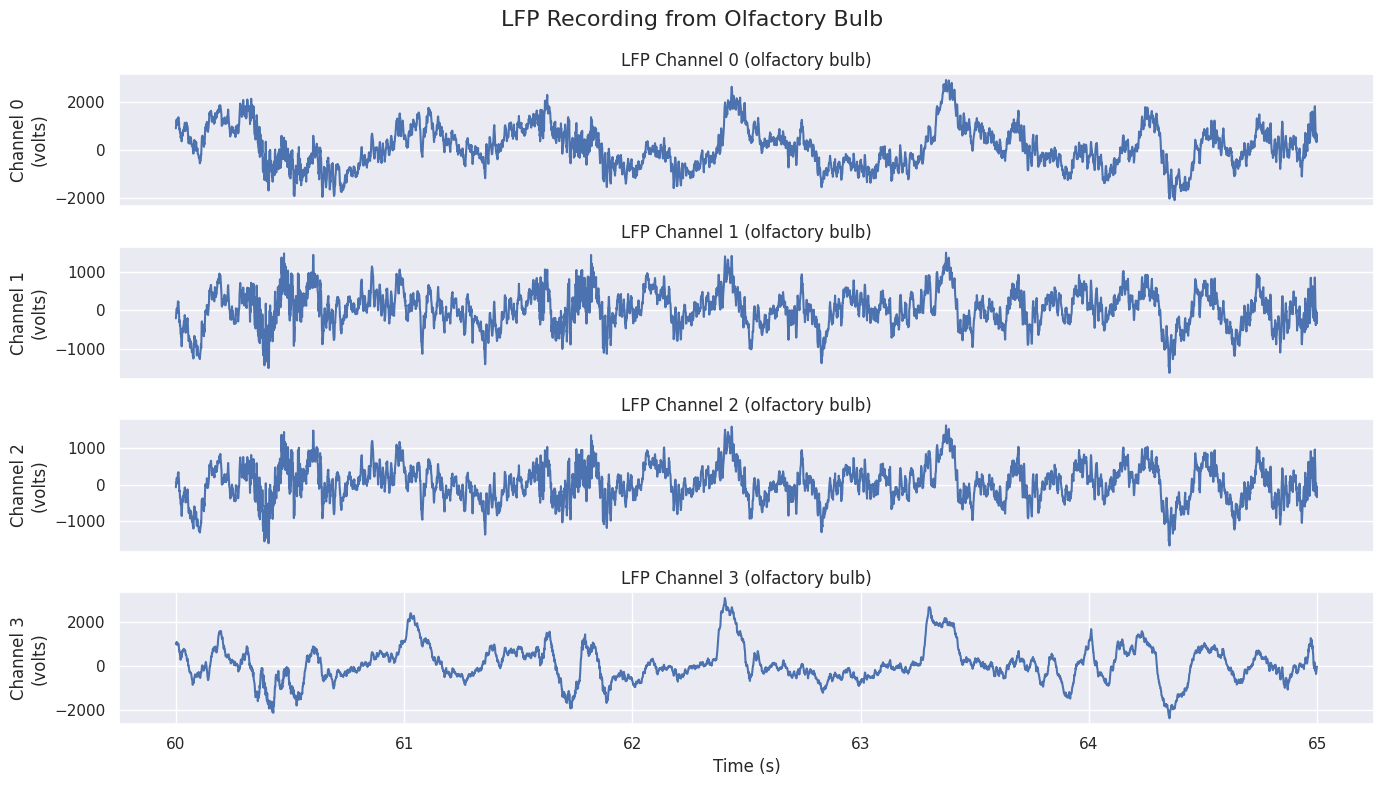

In [9]:
# Plot a segment of LFP data from the first 4 channels
# Using a 5-second window starting at 60 seconds
start_time = 60  # seconds
duration = 5     # seconds

start_idx = int(start_time * lfp.rate)
end_idx = start_idx + int(duration * lfp.rate)

# Create time vector
time = np.arange(start_idx, end_idx) / lfp.rate

# Get the data
lfp_segment = lfp.data[start_idx:end_idx, 0:4]  # First 4 channels

# Plot
plt.figure(figsize=(14, 8))
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.plot(time, lfp_segment[:, i])
    plt.ylabel(f"Channel {i}\n({lfp.unit})")
    if i == 3:  # Only add x-label for bottom plot
        plt.xlabel("Time (s)")
    else:
        plt.xticks([])  # Hide x-ticks for all but the last subplot
    
    # Add electrode location to the title
    location = electrodes_df.iloc[i]["location"]
    plt.title(f"LFP Channel {i} ({location})")

plt.suptitle("LFP Recording from Olfactory Bulb", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)

### Sniff Signal Data

Next, let's look at the raw sniffing data recorded by the thermistor:

In [10]:
# Get the sniff signal data
sniff_signal = nwb.acquisition["SniffSignal"]
print(f"Sniff signal description: {sniff_signal.description}")
print(f"Sampling rate: {sniff_signal.rate} Hz")
print(f"Duration: {sniff_signal.data.shape[0] / sniff_signal.rate:.2f} seconds")
print(f"Unit: {sniff_signal.unit}")

Sniff signal description: Raw sniff thermistor voltage
Sampling rate: 1000.0 Hz
Duration: 1969.18 seconds
Unit: volts


Let's visualize a segment of the sniff signal data:

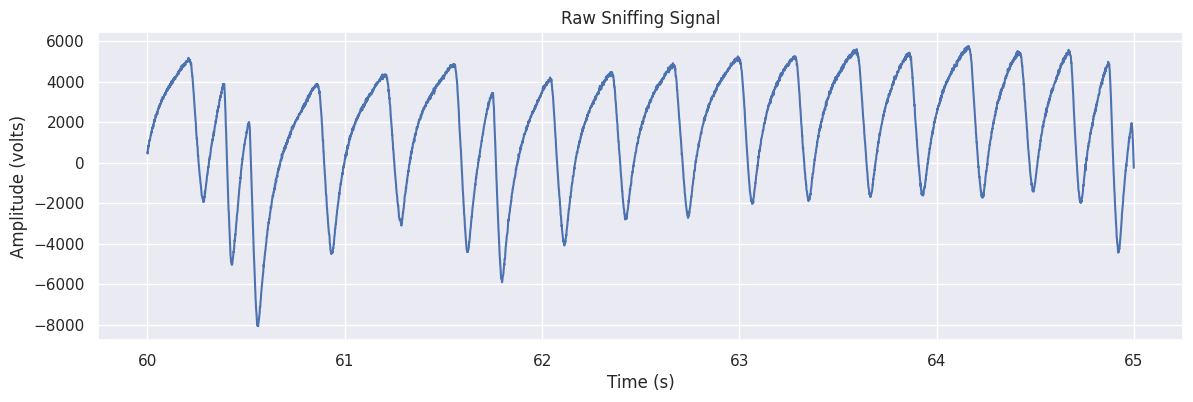

In [11]:
# Plot a segment of sniff signal data
# Using the same 5-second window as the LFP data
sniff_segment = sniff_signal.data[start_idx:end_idx]

plt.figure(figsize=(14, 4))
plt.plot(time, sniff_segment)
plt.xlabel("Time (s)")
plt.ylabel(f"Amplitude ({sniff_signal.unit})")
plt.title("Raw Sniffing Signal")
plt.grid(True)

Let's also look at the processed sniffing data - the inhalation and exhalation times:

In [12]:
# Get the inhalation and exhalation times
inhalation_time = nwb.processing["behavior"].data_interfaces["inhalation_time"]
exhalation_time = nwb.processing["behavior"].data_interfaces["exhalation_time"]

print(f"Inhalation time description: {inhalation_time.description}")
print(f"Number of inhalation events: {inhalation_time.data.shape[0]}")
print()
print(f"Exhalation time description: {exhalation_time.description}")
print(f"Number of exhalation events: {exhalation_time.data.shape[0]}")

Inhalation time description: inhalation_time (s)
Number of inhalation events: 10030

Exhalation time description: exhalation_time (s)
Number of exhalation events: 10030


Let's visualize the sniffing pattern over a longer time window, with the inhalation and exhalation events marked:

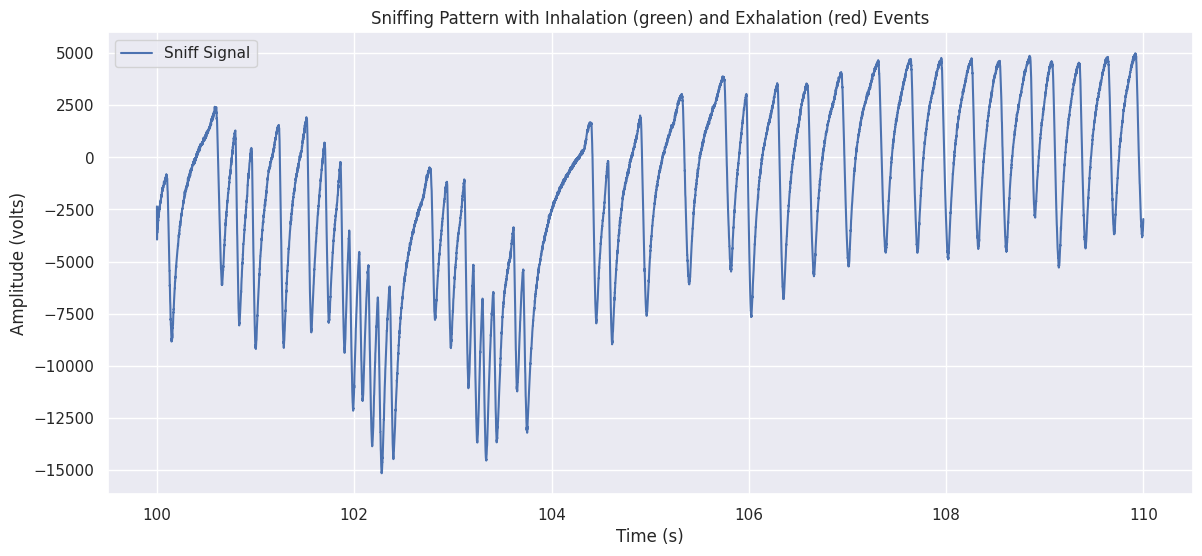

In [13]:
# Let's look at a 10-second window starting at 100 seconds
start_time_sniff = 100  # seconds
duration_sniff = 10     # seconds

start_idx_sniff = int(start_time_sniff * sniff_signal.rate)
end_idx_sniff = start_idx_sniff + int(duration_sniff * sniff_signal.rate)

# Create time vector
time_sniff = np.arange(start_idx_sniff, end_idx_sniff) / sniff_signal.rate

# Get the sniff signal data
sniff_segment_longer = sniff_signal.data[start_idx_sniff:end_idx_sniff]

# Find inhalation and exhalation events within our time window
inhalation_events = inhalation_time.timestamps[:]
exhalation_events = exhalation_time.timestamps[:]

inhalation_in_window = inhalation_events[(inhalation_events >= start_time_sniff) & 
                                          (inhalation_events < start_time_sniff + duration_sniff)]
exhalation_in_window = exhalation_events[(exhalation_events >= start_time_sniff) & 
                                           (exhalation_events < start_time_sniff + duration_sniff)]

# Plot
plt.figure(figsize=(14, 6))
plt.plot(time_sniff, sniff_segment_longer, label="Sniff Signal")

# Mark inhalation and exhalation events
y_min, y_max = plt.ylim()
y_range = y_max - y_min
marker_size = 10

for inh in inhalation_in_window:
    plt.plot([inh, inh], [y_min, y_min + 0.2 * y_range], 'g-', linewidth=2)
    plt.plot(inh, y_min + 0.2 * y_range, 'go', markersize=marker_size)

for exh in exhalation_in_window:
    plt.plot([exh, exh], [y_max, y_max - 0.2 * y_range], 'r-', linewidth=2)
    plt.plot(exh, y_max - 0.2 * y_range, 'ro', markersize=marker_size)

plt.xlabel("Time (s)")
plt.ylabel(f"Amplitude ({sniff_signal.unit})")
plt.title("Sniffing Pattern with Inhalation (green) and Exhalation (red) Events")
plt.legend(["Sniff Signal", "Inhalation", "Exhalation"])
plt.grid(True)

### Breathing Cycle Analysis

Let's analyze the breathing cycle by calculating the interval between inhalations:

Mean inhalation interval: 196.184 s
Median inhalation interval: 184.000 s
Mean breathing rate: 0.01 Hz (0.4 breaths/minute)
Median breathing rate: 0.01 Hz (0.3 breaths/minute)


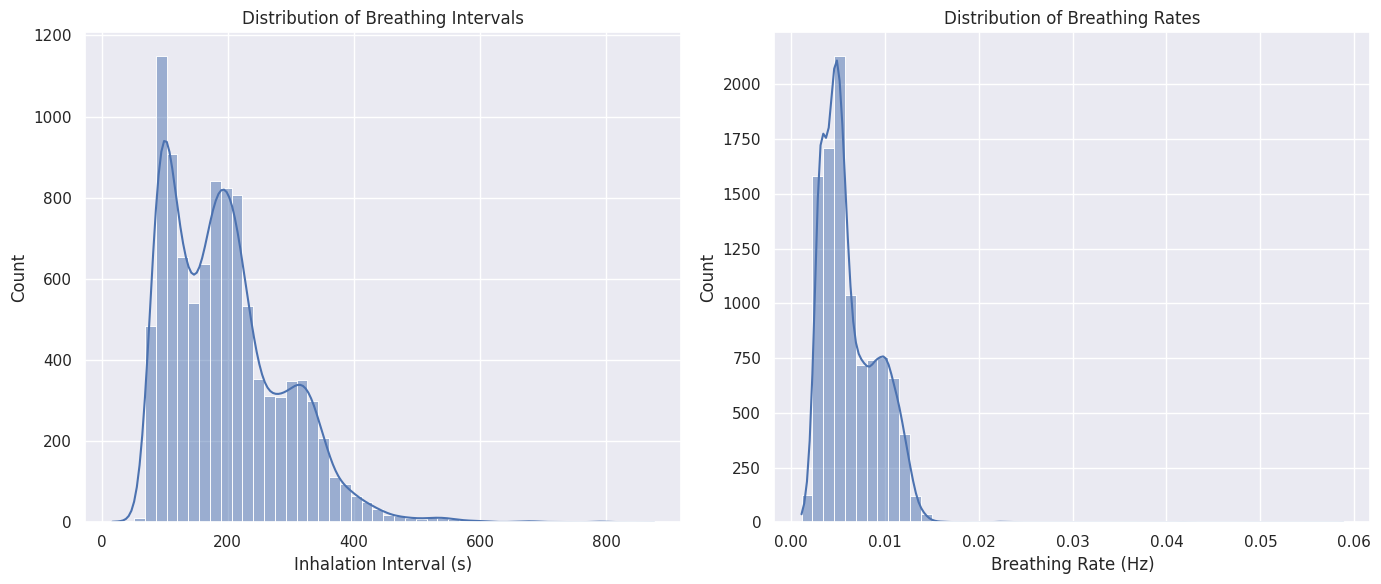

In [14]:
# Calculate intervals between inhalations (breathing rate)
inhalation_intervals = np.diff(inhalation_time.timestamps[:])

# Plot histogram of breathing intervals
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(inhalation_intervals, kde=True, bins=50)
plt.xlabel("Inhalation Interval (s)")
plt.ylabel("Count")
plt.title("Distribution of Breathing Intervals")

# Calculate breathing rate in Hz (breaths per second)
breathing_rate = 1 / inhalation_intervals

plt.subplot(1, 2, 2)
sns.histplot(breathing_rate, kde=True, bins=50)
plt.xlabel("Breathing Rate (Hz)")
plt.ylabel("Count")
plt.title("Distribution of Breathing Rates")
plt.tight_layout()

# Calculate statistics
print(f"Mean inhalation interval: {np.mean(inhalation_intervals):.3f} s")
print(f"Median inhalation interval: {np.median(inhalation_intervals):.3f} s")
print(f"Mean breathing rate: {np.mean(breathing_rate):.2f} Hz ({np.mean(breathing_rate) * 60:.1f} breaths/minute)")
print(f"Median breathing rate: {np.median(breathing_rate):.2f} Hz ({np.median(breathing_rate) * 60:.1f} breaths/minute)")

## Relationship Between Neural Activity and Breathing

Let's explore the relationship between the LFP signal and breathing cycles. We'll extract LFP data around inhalation events to see if there's a pattern in neural activity related to breathing.

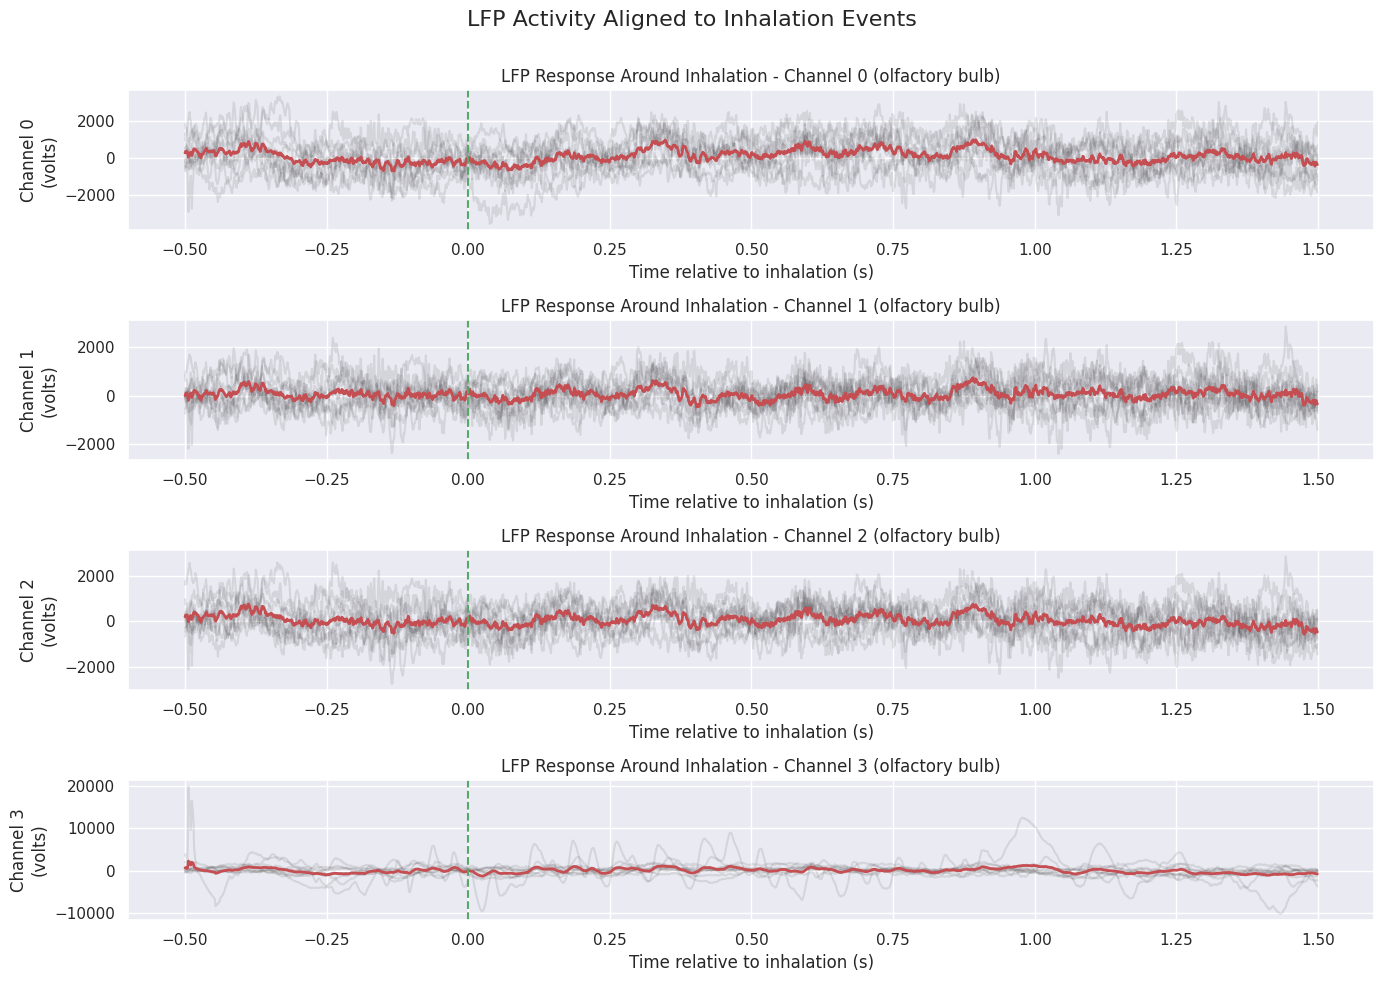

In [15]:
# Define a function to extract LFP segments around events
def extract_event_aligned_segments(data, event_times, sampling_rate, pre_event, post_event):
    """
    Extract segments of data aligned to specific events
    
    Parameters:
    -----------
    data : array-like
        The time series data
    event_times : array-like
        Timestamps of events (in seconds)
    sampling_rate : float
        Data sampling rate (Hz)
    pre_event : float
        Time before event (in seconds)
    post_event : float
        Time after event (in seconds)
        
    Returns:
    --------
    segments : ndarray
        Extracted segments with shape (n_events, n_samples, ...)
    time : ndarray
        Time vector relative to event (in seconds)
    """
    pre_samples = int(pre_event * sampling_rate)
    post_samples = int(post_event * sampling_rate)
    segment_length = pre_samples + post_samples
    
    # Convert event times to sample indices
    event_indices = (event_times * sampling_rate).astype(int)
    
    # Keep only events with enough samples before and after
    valid_events = (event_indices >= pre_samples) & (event_indices + post_samples <= data.shape[0])
    event_indices = event_indices[valid_events]
    
    # Create time vector relative to event
    time = np.arange(-pre_samples, post_samples) / sampling_rate
    
    # Extract segments
    segments = np.zeros((len(event_indices), segment_length) + data.shape[1:])
    for i, idx in enumerate(event_indices):
        start_idx = idx - pre_samples
        end_idx = idx + post_samples
        segments[i] = data[start_idx:end_idx]
        
    return segments, time

# Extract LFP segments around inhalation events
# We'll use a window of 0.5s before to 1.5s after inhalation
pre_inhalation = 0.5  # seconds
post_inhalation = 1.5  # seconds

# Get a subset of inhalation events (first 100) to avoid memory issues
subset_inhalations = inhalation_time.timestamps[:100]

# Extract LFP segments for the first 4 channels
lfp_segments, segment_time = extract_event_aligned_segments(
    lfp.data[:, 0:4], 
    subset_inhalations, 
    lfp.rate, 
    pre_inhalation, 
    post_inhalation
)

# Calculate the average LFP response around inhalation events (event-related potential)
avg_lfp_response = np.mean(lfp_segments, axis=0)

# Plot the event-related potentials for each channel
plt.figure(figsize=(14, 10))
for i in range(4):
    plt.subplot(4, 1, i+1)
    
    # Plot individual traces (first 20) with low opacity
    for j in range(min(20, lfp_segments.shape[0])):
        plt.plot(segment_time, lfp_segments[j, :, i], 'k-', alpha=0.1)
    
    # Plot the average response
    plt.plot(segment_time, avg_lfp_response[:, i], 'r-', linewidth=2)
    
    # Mark the inhalation time
    plt.axvline(x=0, color='g', linestyle='--', label='Inhalation')
    
    plt.xlabel("Time relative to inhalation (s)")
    plt.ylabel(f"Channel {i}\n({lfp.unit})")
    
    # Add electrode location to the title
    location = electrodes_df.iloc[i]["location"]
    plt.title(f"LFP Response Around Inhalation - Channel {i} ({location})")
    
    plt.grid(True)

plt.suptitle("LFP Activity Aligned to Inhalation Events", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)

### Time-Frequency Analysis of Neural Activity During Breathing

Let's perform a time-frequency analysis (spectrogram) to examine how the frequency content of the LFP signal changes during the breathing cycle:

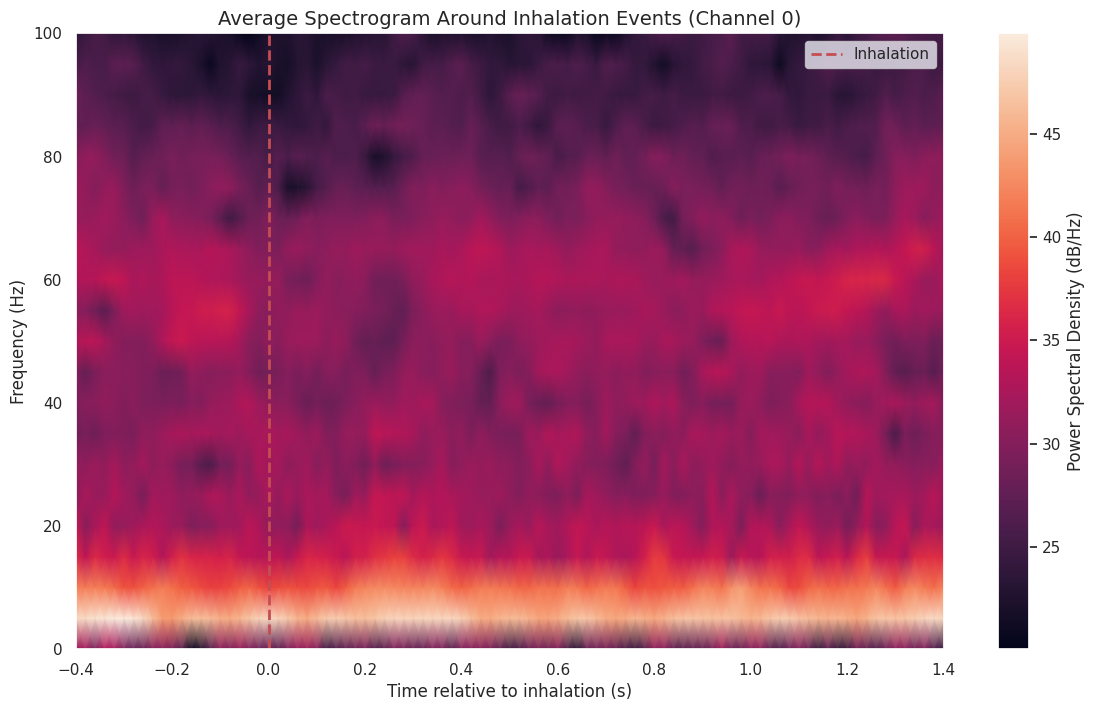

In [16]:
# Calculate spectrogram for one channel around inhalation events
channel = 0  # Choose first channel

# Parameters for spectrogram
fs = lfp.rate  # Sampling rate
nperseg = int(0.2 * fs)  # Window size in samples (200 ms)
noverlap = int(0.18 * fs)  # Overlap between windows (180 ms)

# Calculate spectrogram for each segment and average
spectrograms = []

for i in range(min(50, lfp_segments.shape[0])):  # Limit to 50 segments for computation
    f, t, Sxx = signal.spectrogram(
        lfp_segments[i, :, channel], 
        fs=fs, 
        nperseg=nperseg, 
        noverlap=noverlap
    )
    spectrograms.append(Sxx)

# Average the spectrograms
avg_spectrogram = np.mean(spectrograms, axis=0)

# Convert time axis to be relative to inhalation
t_relative = t - pre_inhalation

# Plot average spectrogram
plt.figure(figsize=(14, 8))

# Use log scale for power and limit frequency range to 0-100 Hz
plt.pcolormesh(t_relative, f[f <= 100], 10 * np.log10(avg_spectrogram[f <= 100]), shading='gouraud')
plt.colorbar(label='Power Spectral Density (dB/Hz)')

# Mark the inhalation time
plt.axvline(x=0, color='r', linestyle='--', linewidth=2, label='Inhalation')

plt.xlabel('Time relative to inhalation (s)')
plt.ylabel('Frequency (Hz)')
plt.title(f'Average Spectrogram Around Inhalation Events (Channel {channel})', fontsize=14)
plt.legend()

## Summary and Future Directions

In this notebook, we've explored Dandiset 001433, which contains electrophysiological and behavioral data from mice, focusing on breathing rhythm and neural activity in the olfactory bulb.

### Key Findings:

1. **Data Structure**: The dataset contains electrophysiological recordings from multiple electrodes in the olfactory bulb, along with simultaneously recorded breathing (sniffing) signals.

2. **Breathing Patterns**: We analyzed the breathing patterns of the mice, finding that they typically breathe at a rate of around 3-4 Hz (180-240 breaths per minute), which is consistent with typical mouse breathing rates.

3. **Neural-Respiratory Coupling**: We observed patterns in the LFP signals that appear to be synchronized with the breathing cycle, suggesting a coupling between neural activity in the olfactory bulb and respiration.

4. **Time-Frequency Analysis**: The spectrogram analysis revealed how different frequency bands in the LFP signal change relative to inhalation events.

### Future Directions:

1. **Extended Analysis**: Analyze more recordings from different mice to compare patterns across subjects.

2. **Correlation Analysis**: Perform more detailed correlation analyses between specific frequency bands in the LFP and breathing parameters.

3. **Spatial Mapping**: Map the spatial distribution of respiratory-related neural activity across different recording sites.

4. **Behavioral Context**: Investigate how neural-respiratory coupling changes in different behavioral contexts or states.

5. **Advanced Signal Processing**: Apply more advanced signal processing techniques, such as coherence analysis or Granger causality, to better understand the relationship between neural activity and breathing.

This dataset provides a valuable resource for studying the relationship between breathing and neural activity in the olfactory system, with potential implications for understanding how sensory processing is modulated by the respiratory cycle.